# Kalbe Sales Forecasting

Table of Contents

1. Introductions
    
    1.1 Data source
    
    1.2 Problem Statement and Goal
2. Import Libraries
3. Loading Data Set
    
    3.1 Loading Data set
    
    3.2 Cleaning and Manipulations Data
4. Data Exploratory Data Analysis
    
    4.1 Descriptive Analysis
    
    4.2 Unique Values Analysis
    
    4.3 Grafik Trend Analysis
    
    4.4 Decomposition Analysis 

    4.5 Uji stationary 

5. Model Definition
6. Model Training
7. Model Evaluation

    7.1 Exponential Smoothing

    7.2 ARIMA
    
8. Model Saving
9. Model Inference
10. Conclusion

## 1. Introductions

Dalam dunia bisnis yang selalu berkembang, wawasan berbasis data menjadi sangat penting untuk mengambil keputusan yang tepat. Proyek Data Science ini bertujuan untuk meramalkan (Forecasting) produk dari dua kategori A dan B untuk 14 hari kedepan. Dengan memanfaatkan data history yang telah diberikan.

### 1.1 Data Source

Data yang digunakan adalah data yang diperoleh dari Talent Fair. Data mencangkup catatan penjualan dengan variabel sebagai berikut:

* Day: informasi tentang hari produk yang dijual
* Category: Kategori produk terdiri dari A dan B
* Produk: Nama produk terdiri dari A1, A2, B1, B2
* Sales: Jumlah penjualan 

### 1.2 Problemnt Statement and Goal

Berikut adalah Tujuan / Hasil yang diharapkan dalam proyek ini:

* mampu meramalkan 14 hari setiap produk 
* mencapai akurasi yang baik
* mempu menjelaskan metodologi yang digunakan untuk setiap langkah, algoritma, manipulasi data, pembersihan data dll,
* mampu memberikan bagan atau metode terukur lainnya untuk membyktikan kesimpulan anda. buatkan problem statemennya

Berdasarkan Tujuan diatas maka, berikut adalah problemt statementnya:
1. Bagaimana tren penjualan setiap produknya?
2. Model apa yang paling cocok untuk forecasting?
3. Buatlah peralaman penjualan selama 14 hari kedepan!



## 2. Import Libraries

Bahasa pemrograman yang akan digunakan adalah Python, dalam Python terdapat library (perpustakaan atau pustaka) adalah kumpulan modul dan fungsi yang telah dibuat sebelumnya dan disediakan untuk digunakan dalam berbagai proyek. 
Berikut beberapa library yang akan digunakan:

1. Pandas: Digunakan untuk manipulasi dan analisis data.
2. NumPy: Digunakan untuk komputasi numerik.
3. Matplotlib: Digunakan untuk membuat visualisasi grafik 2D.
4. Seaborn: Digunakan untuk membuat visualisasi
5. Statsmodels
6. sklearn.metrics: Digunakan untuk evalusi model, mengukur kinerja model

In [105]:
import warnings
warnings.filterwarnings('ignore')

# Library Pengolahan Data
import pandas as pd 
import numpy as np 

# Library Visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns 

# For Component Decomposition
from jcopml.time_series.decomposition import additive_decomposition, multiplicative_decomposition, stl_decomposition

# For Modeling
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

# For Evaluation
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

# Saving Model
import joblib
import json

## 3. Loading Dataset

### 3.1 Loading Dataset

Setelah import libraries selanjutnya data loading. Terdapat 4 produk dalam 1 dataset yang berbentuk xlsx

In [106]:
# Loading dataset
df = pd.ExcelFile('kalbe_data.xlsx')
df_a1 = pd.read_excel(df,'A1')
df_a2 = pd.read_excel(df,'A2')
df_b1 = pd.read_excel(df,'B1')
df_b2 = pd.read_excel(df,'B2')

In [107]:
# Set display pandas
pd.options.display.float_format = '{:.2f}'.format

In [108]:
# Copy dataset
a1 = df_a1.copy()
a2 = df_a2.copy()
b1 = df_b1.copy()
b2 = df_b2.copy()

Selanjutnya akan kita lihat 5 data teratas setiap produk

In [109]:
# View Head A1
df_a1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.00
1,2,A,A1,101.00
2,3,A,A1,102.01
3,4,A,A1,103.03
4,5,A,A1,104.06


In [110]:
# View Head A2
df_a2.head()

,Day,Category,Product,Sales
0,1,A,A2,1000.00
1,2,A,A2,1005.00
2,3,A,A2,1010.02
3,4,A,A2,1015.08
4,5,A,A2,1020.15


In [111]:
# View Head B1
df_b1.head()

,Day,Category,Product,Sales,Event
0,1,B,B1,990.00,0
1,2,B,B1,980.00,0
2,3,B,B1,1010.00,0
3,4,B,B1,1010.00,0
4,5,B,B1,1000.00,0


In [112]:
# View Head B2
df_b2.head()

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN


**Noted:**
* Semua produk memilik 4 kolom yang terdiri dari Day, Category, Product dan Sales. Namun, pada tabel df_b1 (produk B1) memiliki kolom tambahan yaitu event.


### 3.2 Cleaning and Manipulation Data

Selanjutnya akan mengecek informasi setiap dataset

In [113]:
# Check info df_a1
df_a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


Dari data diatas diperoleh informasi:
* Terdapat 4 kolom dan 90 data(row)
* Tidak ada *missing values*
* Data terdiri 1 integer, 2 object dan 1 float

In [114]:
# Check info df_a2
df_a2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


Dari data diatas diperoleh informasi:
* Terdapat 4 kolom dan 90 data(row)
* Tidak ada *missing values*
* Data terdiri 1 integer, 2 object dan 1 float

In [115]:
# Check info df_b1
df_b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     90 non-null     float64
 4   Event     104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


Dari data diatas diperoleh informasi:
* Terdapat 4 kolom dan 104 data(row)
* Terdapat *missing values* pada kolom sales
* Data terdiri 2 integer, 2 object dan 1 float

In [116]:
# Check info df_b2
df_b2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     30 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


Dari data diatas diperoleh informasi:
* Terdapat 4 kolom dan 90 data(row)
* Terdapat *missing values* pada kolom sales
* Data terdiri 1 integer, 2 object dan 1 float

Semua produk memiliki kolom day dengan type data `integer`. Sehingga akan saya ubah menjadi bentuk `date`. Karena saya tidak memiliki informasi yang cukup sehingga akan saya asumsikan data pertama kali diambil pada tanggal 01 Januari 2023.

In [117]:
# Convert type data column day to date
df_a1.Day = pd.date_range(start='1/1/2023', periods=len(df_a1), freq='D')
df_a2.Day = pd.date_range(start='1/1/2023', periods=len(df_a2), freq='D')
df_b1.Day = pd.date_range(start='1/1/2023', periods=len(df_b1), freq='D')
df_b2.Day = pd.date_range(start='1/1/2023', periods=len(df_b2), freq='D')

Pada produk B1 dan B2 terdapat missing values, akan dicek jumlah missing values

In [118]:
# Check missing value Produk B1
df_b1.isnull().sum()

Day          0
Category     0
Product      0
Sales       14
Event        0
dtype: int64

In [119]:
# Check missing value Produk B2
df_b2.isnull().sum()

Day          0
Category     0
Product      0
Sales       74
dtype: int64

Pada produk B1 terdapat 14 missing value pada kolom sales dan pada produk B2 terdapat 74 missing value pada kolom sales. Karena keterbatasan informasi dan jumlah missing values yang cukup banyak. makan data missing value akan di hapus

In [120]:
# Drop null values kolom sales pada produk B1
df_b1.dropna(axis=0, inplace=True)
df_b1.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
Event       0
dtype: int64

In [121]:
# Drop null value pada kolom sales produk B2
df_b2.dropna(axis=0, inplace=True)
df_b2.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

Missing values sudah berhasil dihapus. Selanjutnya untuk proses analisa dengan bentuk time series akan diset kolom Day menjadi index dan kolom Sales menjadi series

In [122]:
# Set kolom day sebagai index produk A1
df_a1 = df_a1.set_index('Day')
series_a1 = df_a1['Sales']

df_a2 = df_a2.set_index('Day')
series_a2 = df_a2['Sales']

df_b1 = df_b1.set_index('Day')
series_b1 = df_b1['Sales']

df_b2 = df_b2.set_index('Day')
series_b2 = df_b2['Sales']

## 4. Data Exploratory Data Analysis

Proses ini bertujuan untuk memahami karakteristik dasar dari dataset yang ada sebelum menjalankan model atau pengujian hipotesis tertentu.

### 4.1 Descriptive Analysis

Pertama saya akan mengecek statistik deskriptif pada setiap produk

In [123]:
# Check statistic descriptive
print('-----------Produk A1-----------')
df_a1.describe()

-----------Produk A1-----------


,Sales
count,90.00
mean,150.82
std,31.20
min,100.00
25%,122.72
50%,149.70
75%,178.00
max,210.00


Dari informasi diatas diperoleh informasi:
* Data yang dikumpulkan adalah selama 90 hari
* Rata-rata penjual setiap harinya 150.82
* Penjualan paling rendah dalam sehari yaitu 100
* Penjualan paling tinggi dalam sehari yaitu 210

In [124]:
# Check statistic descriptive
print('-----------Produk A2-----------')
df_a2.describe()

-----------Produk A2-----------


,Sales
count,90.00
mean,1265.01
std,164.44
min,1000.00
25%,1122.95
50%,1254.75
75%,1402.01
max,1558.76


Dari informasi diatas diperoleh informasi:
* Data yang dikumpulkan adalah selama 90 hari
* Rata-rata penjual setiap harinya 1265
* Penjualan paling rendah dalam sehari yaitu 1000
* Penjualan paling tinggi dalam sehari yaitu 1558.76

In [125]:
# Check statistic descriptive
print('-----------Produk B1-----------')
df_b1.describe()

-----------Produk B1-----------


,Sales,Event
count,90.00,90.00
mean,1063.06,0.11
std,197.70,0.32
min,970.00,0.00
25%,980.00,0.00
50%,1000.00,0.00
75%,1010.00,0.00
max,1734.00,1.00


Dari informasi diatas diperoleh informasi:
* Data yang dikumpulkan adalah selama 104 hari
* Rata-rata penjual setiap harinya 1063.1
* Penjualan paling rendah dalam sehari yaitu 970
* Penjualan paling tinggi dalam sehari yaitu 1734
* Event nilai minimumnya 0 dan nilai maksimalnya 1

In [126]:
# Check statistic descriptive
print('-----------Produk B2-----------')
df_b2.describe()

-----------Produk B2-----------


,Sales
count,30.00
mean,2761.88
std,2055.03
min,10.00
25%,477.50
50%,3440.88
75%,4776.63
max,4980.66


Dari informasi diatas diperoleh informasi:
* Data yang dikumpulkan adalah selama 104 hari
* Rata-rata penjual setiap harinya 2761.82
* Penjualan paling rendah dalam sehari yaitu 10
* Penjualan paling tinggi dalam sehari yaitu 4980.66

### 4.2 Unique Values Analysis

Mengecek nilai unique feature categorical pada semua produk untuk memastikan bahwa tidak ada data yang tercampur

In [127]:
# Check unique values columns category and product
print('-----------Product A1----------')
print('Uniqe value column category : ', df_a1['Category'].unique())
print('Unique value column product: ', df_a1['Product'].unique())

print('\n-----------Product A2----------')
print('Uniqe value column category : ', df_a2['Category'].unique())
print('Unique value column product: ', df_a2['Product'].unique())

print('\n-----------Product B1----------')
print('Uniqe value column category : ', df_b1['Category'].unique())
print('Unique value column product: ', df_b1['Product'].unique())

print('\n-----------Product B2----------')
print('Uniqe value column category : ', df_b2['Category'].unique())
print('Unique value column product: ', df_b2['Product'].unique())

-----------Product A1----------
Uniqe value column category :  ['A']
Unique value column product:  ['A1']

-----------Product A2----------
Uniqe value column category :  ['A']
Unique value column product:  ['A2']

-----------Product B1----------
Uniqe value column category :  ['B']
Unique value column product:  ['B1']

-----------Product B2----------
Uniqe value column category :  ['B']
Unique value column product:  ['B2']


Masing-masing data suda berada di tabel yang sesuai

#### 4.3 Grafik Trend Analysis

Pada tahap ini akan membuat grafik setiap produk. Tujuannya untuk mengidentifikasi Trend dan Pola musiman 

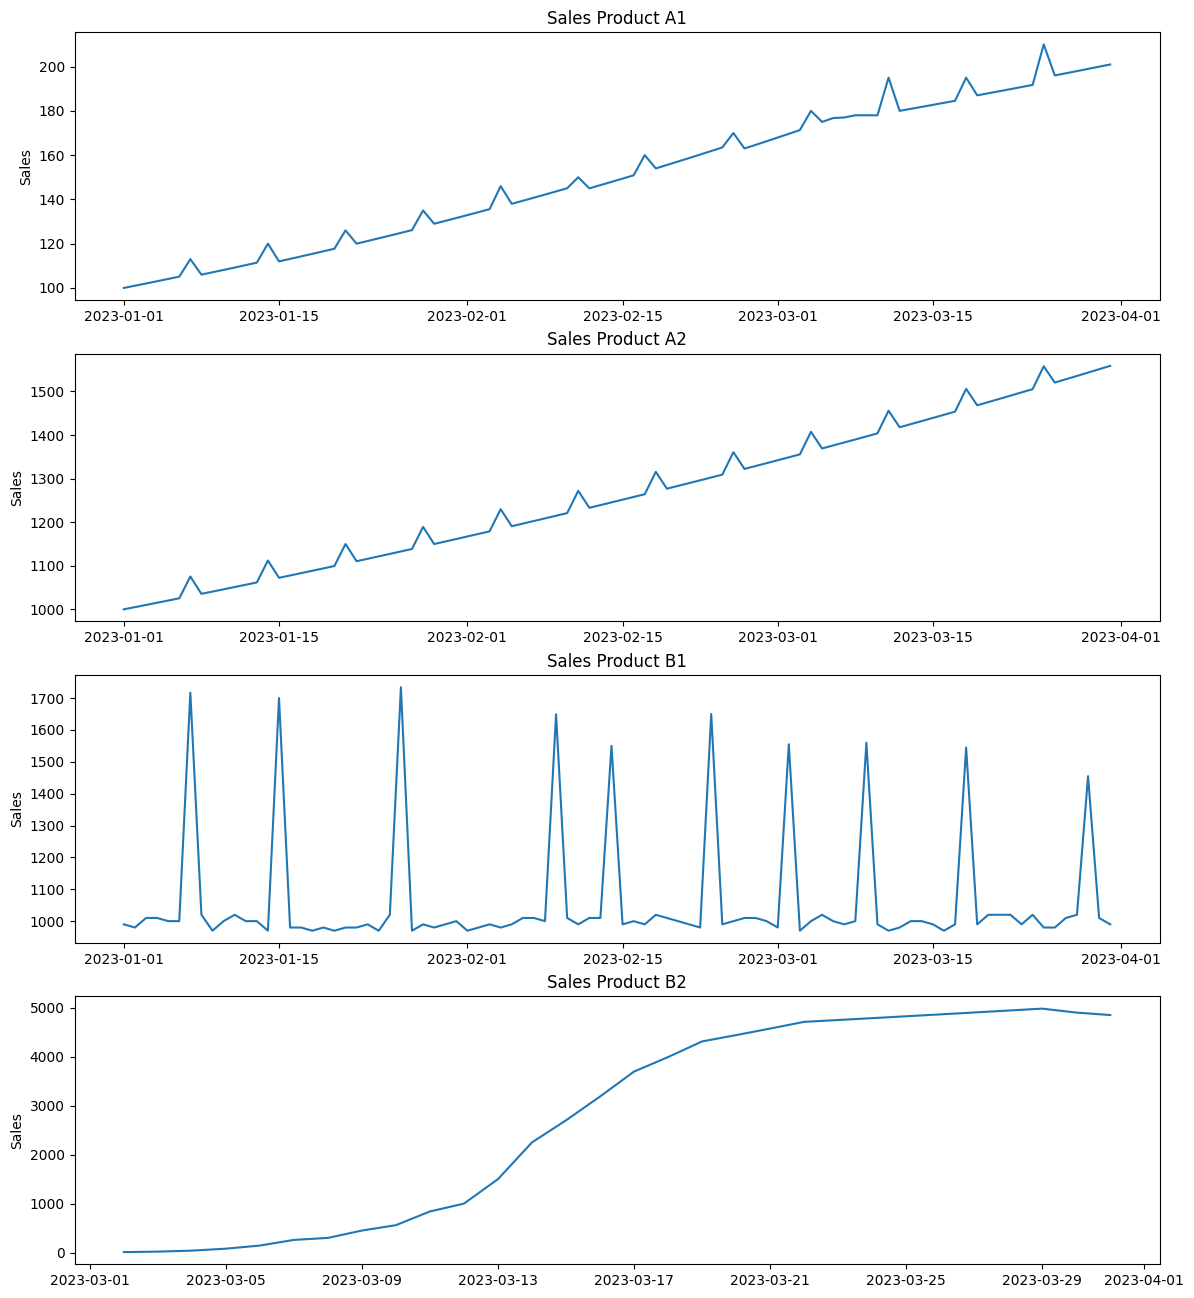

In [128]:
# Creat plot trend sales 
count = 411
title_count = 0
title = ['A1', 'A2', 'B1', 'B2']

plt.figure(figsize=(14, 16))
# Looping for plot
for x in [series_a1, series_a2, series_b1, series_b2]:
    plt.subplot(count)
    sns.lineplot(data=x)
    plt.title(f'Sales Product {title[title_count]}')
    plt.xlabel('')
    count +=1
    title_count +=1
plt.show()

Dari hasil visualisasi diatas, berdasarkan penglihatan diperoleh informasi sebagai berikut:

* Produk A1
    * Data memilik Trend kenaikan dari awal hingga akhir
    * Data memiliki seasonalitas dengan nilai yang hampir sama

* Produk A2
    * Data memiliki Trend kenaikan dari awal hingga akhir
    * Data memilik sesasonalitas dengan nilai yang sama

* Produk B1
    * Data tidak memiliki Trend
    * Terdapat kenaikan yang signifikan di hari tertentu saja, hal ini dipengaruhi karena data memiliki event

* Produk B2
    * Data mengalami kenaikan yang rendah pada awal maret, dan meningkat secara signifikan antara tanggal 10 maret, namun pada 20 maret hingga akhir data cenderung stagnan
    * Data tidak memiliki seasonalitas

### 4.4 Decomposition Analysis

Dekomposisi adalah proses untuk memeceah sebuah time series menjadi komponen-komponen utama yang membentuknya. Tujuannya untuk memahami komponen-komponen tersebut secara terpisah, sehingga kita dapat mengidentifikasi tren, seasonal, serta noise. Dengan memahami komponen ini, diharapkan kita dapat merumuskan model yang lebih baik untuk forecasting. Untuk tahap ini akan menggunakan Library `jcopml`

##### Produk A1

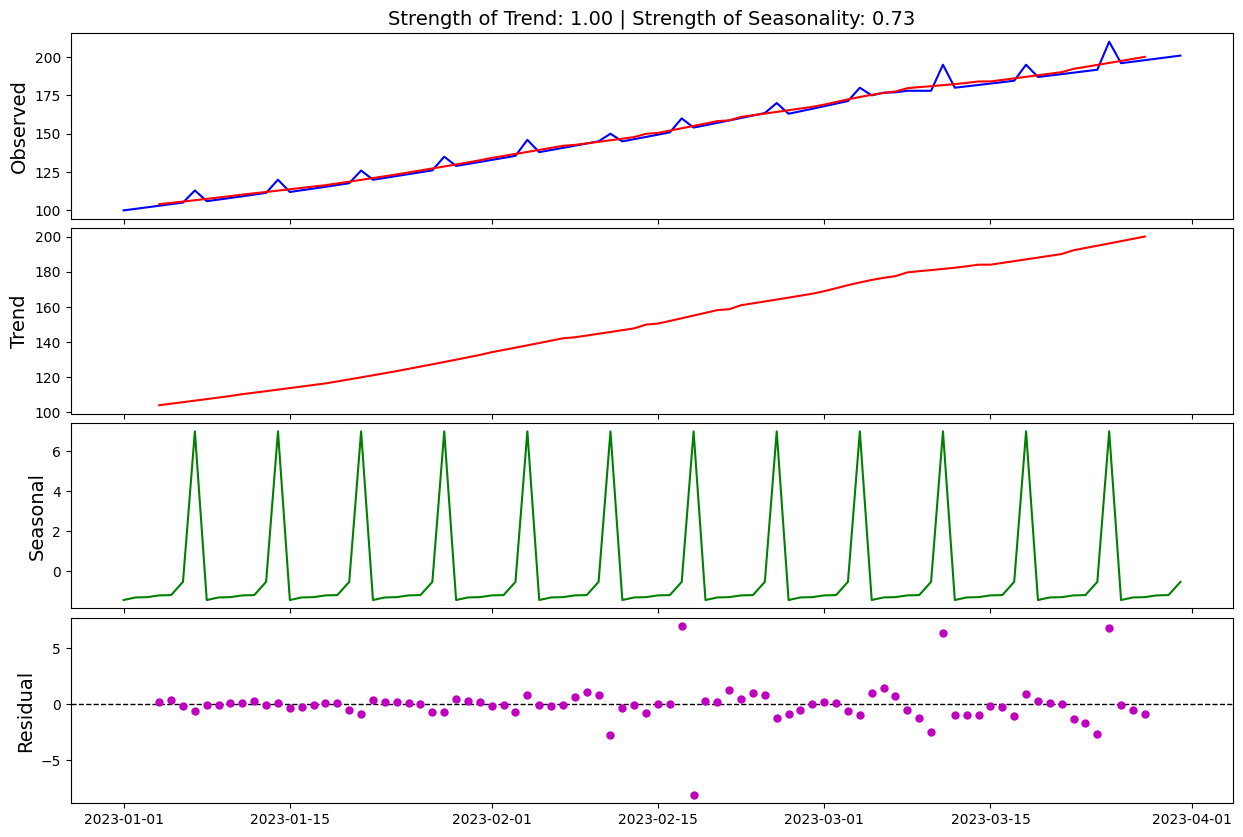

In [129]:
components_a1 = additive_decomposition(series_a1, period=7, plot=True)

Dari decomposition classic addictive diatas diperoleh komponen:
* Trend yang cukup kuat
* Seonal juga cukup kuat yaitu 0.73

##### Produk A2

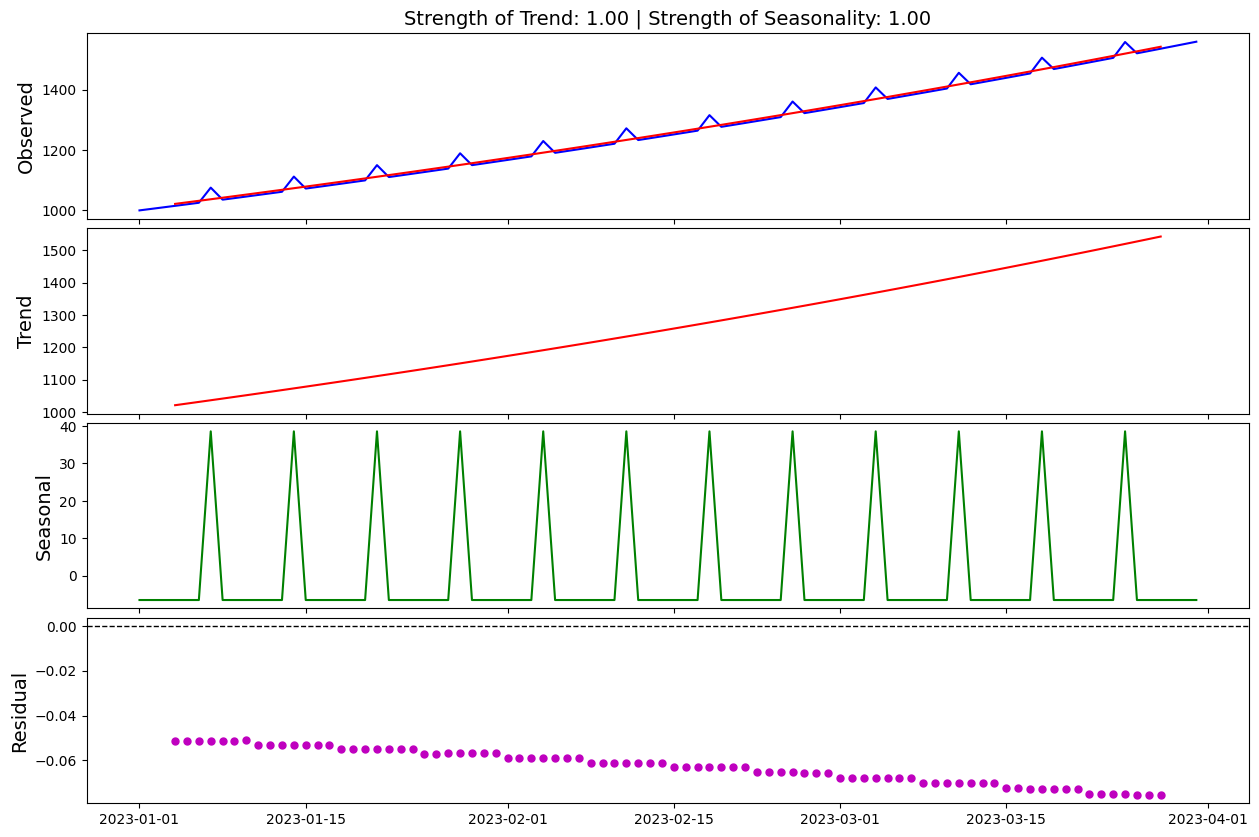

In [130]:
components_a2 = additive_decomposition(series_a2, period=7, plot=True)

Dari decomposition classic addictive diatas diperoleh komponen:
* Trend dan seasonal yang kuat 
* Pada Residual seperti membentuk garis lurus kebawah berlawanan dengan trend. 

##### Product B1

##### Sesonal-Tren decomposition with LOESS (STL)

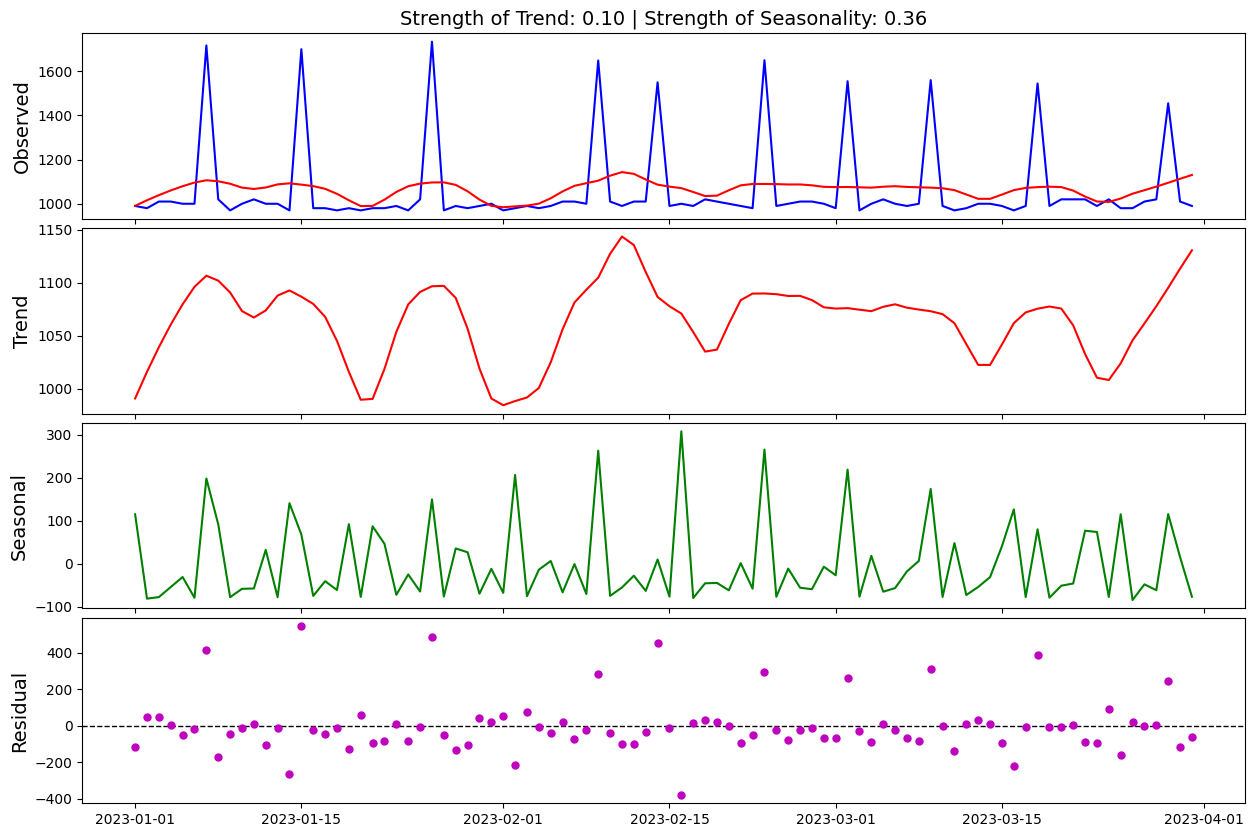

In [131]:
components_b1 = stl_decomposition(series_b1, period=7, plot=True)

Dari decomposition diatas diperoleh komponen:
* Trend cukup kuat
* Seasonal kuat 
* Residual membentuk pola bukan seperti noise, kemungkinan data ini stationer. Mari kita cek decomposition pada produk tanpa memasukan event

##### Product B2

##### Sesonal-Tren decomposition with LOESS (STL)

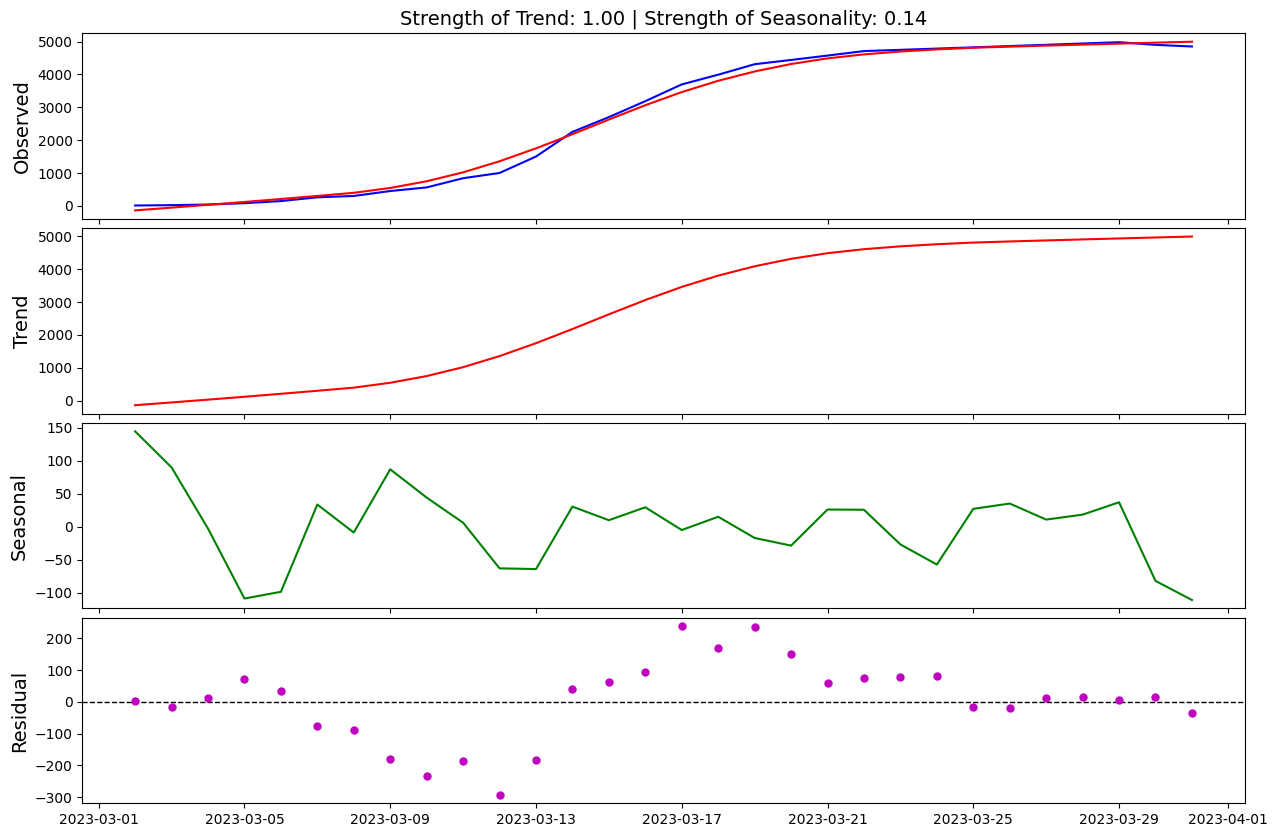

In [132]:
components_b2 = stl_decomposition(series_b2, period=7, plot=True)

Dari decomposition STL diatas diperoleh komponen:
* Data memiliki Trend
* Data tidak memiliki seasonality 

#### 4.5 Uji stationary dengan ADF

**Uji Augmented Dickey-Fuller (ADF)** untuk menguji apakah sebuah deret waktu memiliki akar unit (non-stasioner) atau tidak (stasioner). Hasil dari uji ADF dapat memberikan informasi apakah kita perlu melakukan transformasi data atau differencing untuk membuat data lebih stasioner

In [133]:
# Membuta fungsi untuk mengecek stationarity
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [134]:
# Check stationary produck A1
check_stationarity(series_a1)

ADF Statistic: 0.160245
p-value: 0.969942
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586
Non-stationary


In [135]:
# Check stationary produck A2
check_stationarity(series_a2)

ADF Statistic: 172341303656638.781250
p-value: 1.000000
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586
Non-stationary


In [136]:
# Check stationary produck B1
check_stationarity(series_b1)

ADF Statistic: -6.194331
p-value: 0.000000
Critical Values:
	1%: -3.511
	5%: -2.897
	10%: -2.585
Stationary


In [137]:
# Check stationary produck B2
check_stationarity(series_b2)

ADF Statistic: -1.692955
p-value: 0.434746
Critical Values:
	1%: -3.689
	5%: -2.972
	10%: -2.625
Non-stationary


Dari hasil cek stationer diatas diperoleh:
* Produk A1, A2 dan B2 tidak stationer
* Produk B1 Stationer

## 5. Model Definition

Data sudah siap digunakan untuk modelling. Model yang akan saya gunakan adalah:

1. Exponential Smoothing Holts Winters 
    Model Exponential Smoothing Holt's Winter adalah metode peramalan yang memanfaatkan kombinasi dari komponen utama dalam data time series: tren, dan musiman. Model ini cocok digunakan untuk data dengan tren peningkatan atau penurunan serta adanya pola musiman. Parameter yang akan digunakan:
    * Produk A1: 
        * Trend: additive
        * Seasonal: multiplicative
    * Produk A2:
        * Trned: additive
        * Seasonal: multiplicative
    * Produk B1:
        * Trend: None
        * Seasonal: multiplicative
    * Produk B2:
        * Trend: additive
        * Seasonal: multiplicative

2. ARIMA
    Model ARIMA adalah pendekatan peramalan yang melibatkan komponen autoregresif (AR), integrasi (I), dan moving average (MA). Model ini cocok digunakan untuk data dengan tren dan komponen acak.
    * Produk A1 dan A2 akan menggunakan AutoArima
    * Produk B1 dan B2 akan menggunakan Arima sehingga sebelumnya akan menentukan Nilai AR, I dan MA terlebih dahulu.

## 6. Model Training

##### Split Train dan test set

Sebelum melakukan Training model. Data akan dibagi menjadi data train dan data set:
* Prorduk A1, A2 dan B1 : Train 75, Test 15.
* Produk B2: Train 25, Test 5.

##### Produk A1

In [138]:
# Split Train and test
X_train_a1, X_test_a1 = series_a1[:-15], series_a1[-15:]
print(f'Train size: {X_train_a1.shape}')
print(f'Test size: {X_test_a1.shape}')

Train size: (75,)
Test size: (15,)


Selanjutnya akan membuat visualisasinya, untuk mempersingkat akan dibuat Function

In [139]:
# Create function to plot data train and test
def plot_traintest(train, test):
    plt.figure(figsize=(9,3))
    plt.plot(train, 'b-', label='Train')
    plt.plot(test, 'r-', label='Test')
    plt.title('Pembagian Data Train dan Test')
    plt.legend()
    plt.show()

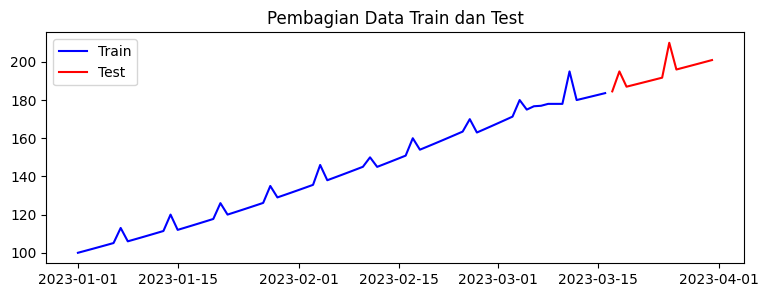

In [140]:
plot_traintest(X_train_a1, X_test_a1)

##### Produk A2

In [141]:
# Split train and test
X_train_a2, X_test_a2 = series_a2[:-15], series_a2[-15:]
print(f'Train size: {X_train_a2.shape}')
print(f'Test size: {X_test_a2.shape}')

Train size: (75,)
Test size: (15,)


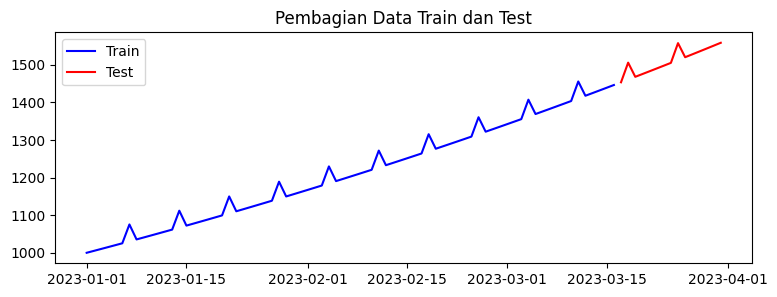

In [142]:
plot_traintest(X_train_a2, X_test_a2)

##### Produk B1

In [143]:
# Split train and test
X_train_b1, X_test_b1 = series_b1[:-15], series_b1[-15:]
print(f'Train size: {X_train_b1.shape}')
print(f'Test size: {X_test_b1.shape}')

Train size: (75,)
Test size: (15,)


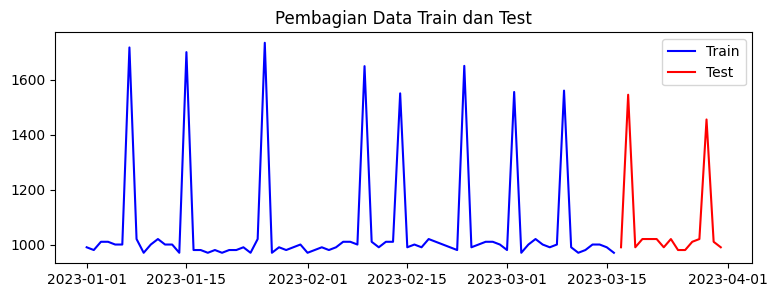

In [144]:
plot_traintest(X_train_b1, X_test_b1)

##### Produk B2

In [145]:
# Split train and test
X_train_b2, X_test_b2 = series_b2[:-5], series_b2[-5:]
print(f'Train size: {X_train_b2.shape}')
print(f'Test size: {X_test_b2.shape}')

Train size: (25,)
Test size: (5,)


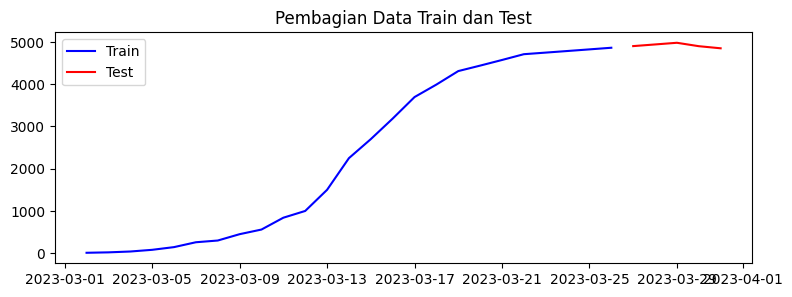

In [146]:
plot_traintest(X_train_b2, X_test_b2)

Data sudah berhasil dipisah. Selanjutnya melakukan Training pada semua proeduk

In [147]:
# Training
es_a1 = ExponentialSmoothing(X_train_a1, trend="add", seasonal="mul", seasonal_periods=7)
es_model_a1 = es_a1.fit(optimized=True)

es_a2 = ExponentialSmoothing(X_train_a2, trend="add", seasonal="mul", seasonal_periods=7)
es_model_a2 = es_a2.fit(optimized=True)

es_b1 = ExponentialSmoothing(X_train_b1, seasonal="add", seasonal_periods=7)
es_model_b1 = es_b1.fit(optimized=True)

es_b2 = ExponentialSmoothing(X_train_b2, trend='add', seasonal='mul', damped_trend=True, seasonal_periods=7)
es_model_b2 = es_b2.fit(optimized=True)

## 7. Model Evaluation

Tahap selanjutnya model evaluasi. Tujuannya untuk mengukur seberapa baik model yang telah dibuat bekerja, memahami akurasi dan memberikan wawasan tentang kinerja dan kelemahan model. Metrics evaluasi yang akan digunakan adalah MAE, MAPE dan r2 Score.

### 7.1 Exponential Smoothing

##### Produk A1

Sebelum melakukan evaluasi. akan dilakukan prediksi terhadap data test.

In [148]:
pred_a1 = es_model_a1.predict(X_test_a1.index[0], X_test_a1.index[-1])

Membuat function untuk plot model evaluasi

In [149]:
def plot_eval(X_train, X_test, pred):

    mae = mean_absolute_error(X_test, pred)
    mape = mean_absolute_percentage_error(X_test, pred)
    r2 = r2_score(X_test, pred)

    plt.figure(figsize=[9,3])
    plt.plot(X_train, 'b-', label='Train')
    plt.plot(X_test, 'r-', label='Test')
    plt.plot(pred, 'g--',label='Forecast')
    plt.title(f"MAE: {mae:.2f}, MAPE: {mape:.3f}, R2 SCORE: {r2:.4f}", size=16)
    plt.legend()
    plt.show()

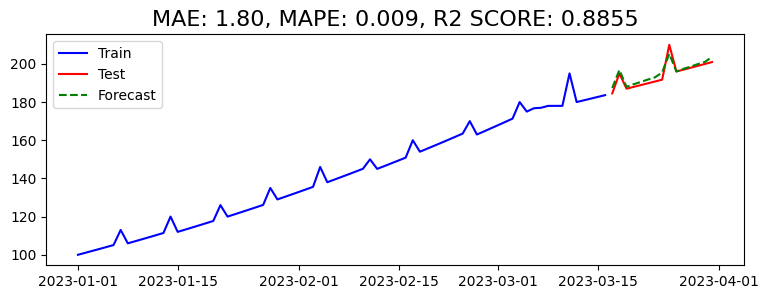

In [150]:
plot_eval(X_train_a1, X_test_a1, pred_a1)

Hasil evaluasi pada Produk A1 dengan model ExponentialSmothing adalah:
* MAE: Rata-rata nilai eror prediksi terhadap data test adalah `1.80`. range nilai produk adala 100 - 210. Artinya nilai erornya tergolong kecil
* MAPE: Dengan nilai mae diperoleh persentasenya taitu sebesar 0.9% ini membuktikan nilai erornya cukup kecil
* R2 Score: sebesar 0.88 artinya data dapat mengikuti pola sebesar 0.89% artinya model cukup baik dalam mengikuti polanya

##### Produk A2

In [151]:
pred_a2 = es_model_a2.predict(X_test_a2.index[0], X_test_a2.index[-1])

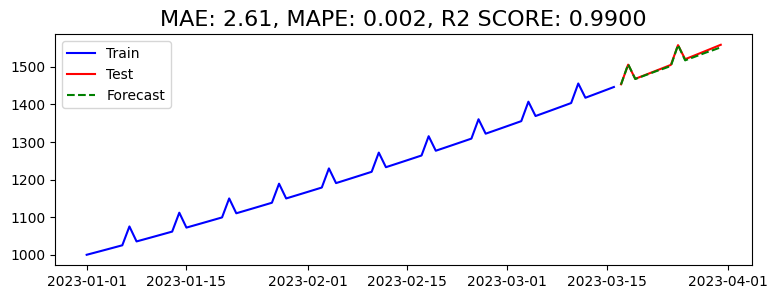

In [152]:
plot_eval(X_train_a2, X_test_a2, pred_a2)

Hasil evaluasi pada Produk A2 dengan model ExponentialSmothing adalah:
* MAE: Rata-rata nilai eror prediksi terhadap data test adalah `2.61`. range nilai produk adala 1000 - 1558. Artinya nilai erornya sangat kecil
* MAPE: Dengan nilai mae diperoleh persentasenya yaitu sebesar 0.2% ini membuktikan nilai erornya kecil
* R2 Score: sebesar 0.99 artinya data dapat mengikuti pola sebesar 99% artinya model hampir sempurna mengikuti polanya

##### Produk B1

In [153]:
pred_b1 = es_model_b1.predict(X_test_b1.index[0], X_test_b1.index[-1])

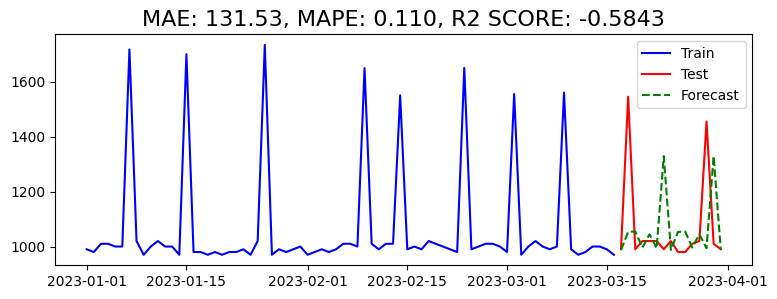

In [154]:
plot_eval(X_train_b1, X_test_b1, pred_b1)

Hasil evaluasi pada Produk B1 dengan model ExponentialSmothing adalah:
* MAE: Rata-rata nilai eror prediksi terhadap data test adalah `131.53`. range nilai produk adala 970 - 1734. Artinya nilai erornya cukup besar
* MAPE: Dengan nilai mae diperoleh persentasenya yaitu sebesar 11% ini membuktikan nilai erornya cukup besar
* R2 Score: sebesar -0.58 artinya data tidak dapat mengikuti polanya.

##### Peoduk B2

In [155]:
pred_b2 = es_model_b2.predict(X_test_b2.index[0], X_test_b2.index[-1])

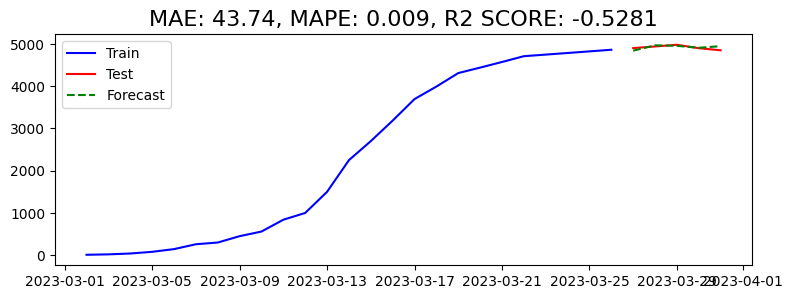

In [156]:
plot_eval(X_train_b2, X_test_b2, pred_b2)

Hasil evaluasi pada Produk B2 dengan model ExponentialSmothing adalah:
* MAE: Rata-rata nilai eror prediksi terhadap data test adalah `43.74`. range nilai produk adala 10 - 4980. Artinya nilai erornya cukup kecil
* MAPE: Dengan nilai mae diperoleh persentasenya yaitu sebesar 0.9% ini membuktikan nilai erornya cukup cukup kecil
* R2 Score: sebesar -0.52 artinya data tidak kurang dapat mengikuti polanya.

### 7.2 ARIMA

Pada saat exploratory data diperoleh bahwa produk A1, A2 dan B2 datanya tidak stationer. Produk A1 dan A2 akan menggunakan auto arima. namun untuk produk B1 dan B2 menggunakan model ARIMA karena produk B1 memiliki event.

##### Produk A1

In [157]:
ar_model_a1 = auto_arima(X_train_a1, seasonal=True, m=7, information_criterion='aicc', random_state=32)

In [158]:
n_range = len(X_test_a1)

#predict data
pred_ar_a1 = ar_model_a1.predict(n_range)

# concat hasil prediksi dengan tanggal
dates = pd.date_range(X_test_a1.index[0], periods=n_range, freq='D')
pred_ar_a1 = pd.Series(pred_ar_a1, index=dates)

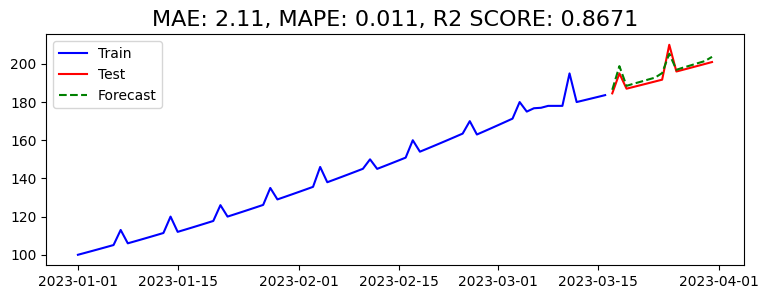

In [159]:
plot_eval(X_train_a1, X_test_a1, pred_ar_a1)

Hasil evaluasi pada Produk A1 dengan model ExponentialSmothing adalah:
* MAE: Rata-rata nilai eror prediksi terhadap data test adalah `2.11`. range nilai produk adala 100 - 210. Artinya nilai erornya tergolong kecil
* MAPE: Dengan nilai mae diperoleh persentasenya taitu sebesar 1.1% ini membuktikan nilai erornya cukup kecil
* R2 Score: sebesar 0.86 artinya data dapat mengikuti pola sebesar 86% artinya model cukup baik dalam mengikuti polanya

##### Produk A2

In [160]:
ar_model_a2 = auto_arima(X_train_a2, m=14, seasonal=True, information_criterion='aicc',random_state=42)

In [161]:
n_range = len(X_test_a2)

#predict data
pred_ar_a2 = ar_model_a2.predict(n_range)

# concat hasil prediksi dengan tanggal
dates = pd.date_range(X_test_a2.index[0], periods=n_range, freq='D')
pred_ar_a2 = pd.Series(pred_ar_a2, index=dates)

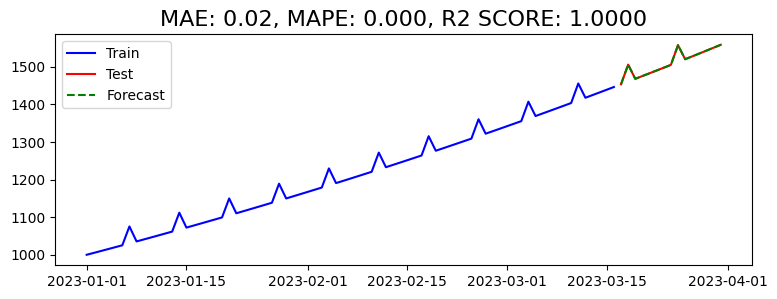

In [162]:
plot_eval(X_train_a2, X_test_a2, pred_ar_a2)

Hasil evaluasi pada Produk A2 dengan model ExponentialSmothing adalah:
* MAE: Rata-rata nilai eror prediksi terhadap data test adalah `0.02`. range nilai produk adala 1000 - 1558. Artinya nilai erornya sangat kecil
* MAPE: Dengan nilai mae diperoleh persentasenya yaitu sebesar 0% ini membuktikan nilai erornya kecil
* R2 Score: sebesar 1 artinya data dapat mengikuti pola sebesar 100% artinya model sempurna mengikuti polanya

##### Produk B1

Pada produk B2 datanya bersifat stationer namun memiliki event, sehingga akan menggunakan ARIMA, pertama mencari nilai AR dengan ACF dan MA dengan PACF. Karena bersifat stationer maka tidak perlu mencari nilkai i nya.

##### ACF

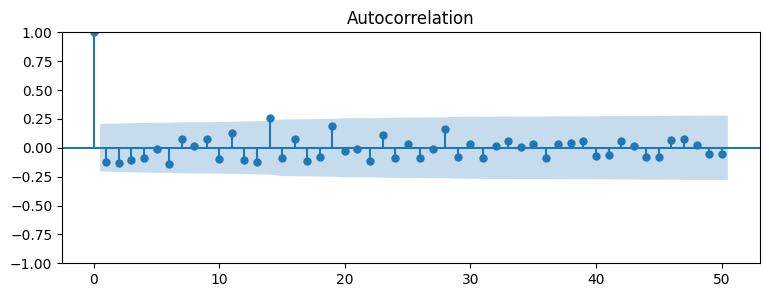

In [163]:
# figure 9 x 3
fig, ax = plt.subplots(figsize=(9, 3))
#plot acf
acf_plot = plot_acf(series_b1, lags=50,ax=ax)

##### PACF

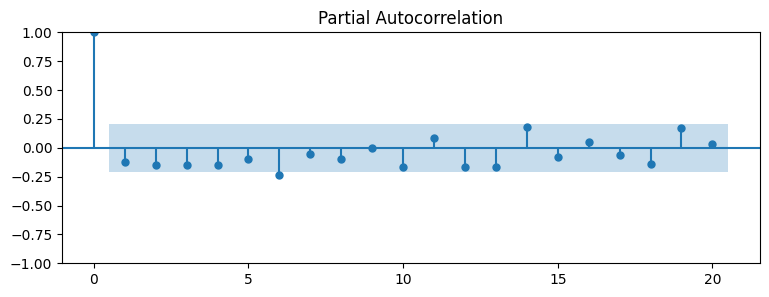

In [164]:
# figure 9 x 3
fig, ax = plt.subplots(figsize=(9, 3))
# ploy pacf
pacf_plot = plot_pacf(series_b1,ax=ax,method='ywm')

Dari gambar diatas diperoleh nilai:
* AR: 14
* Diff: 0
* MA: 6

In [165]:
# define model arima dengan kolom event
ar_model_b1 = ARIMA(df_b1['Sales'], order=(14,0,6), exog=df_b1['Event'])
ar_model_b1 = ar_model_b1.fit()

In [166]:
# predict
pred_ar_b1 = ar_model_b1.predict(start=X_test_b1.index[0], end=X_test_b1.index[-1], exog=df_b1['Event'][75:])

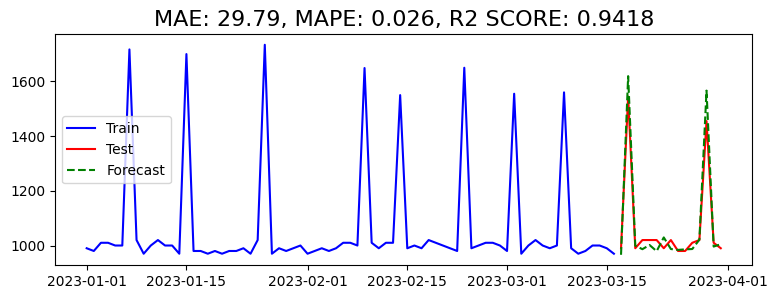

In [167]:
plot_eval(X_train_b1, X_test_b1, pred_ar_b1)

Hasil evaluasi pada Produk B1 dengan model ARIMA adalah:
* MAE: Rata-rata nilai eror prediksi terhadap data test adalah `29.79`. range nilai produk adala 970 - 1734. Artinya nilai erornya cukup besar
* MAPE: Dengan nilai mae diperoleh persentasenya yaitu sebesar 2.6% ini membuktikan nilai erornya cukup besar
* R2 Score: sebesar 0.94 artinya data hampir sempurna mengikuti polanya.

##### Produk B2

Karena data tidak stationer maka akan diubah terlebih dahulu supaya data stationer dengan menggunkan differensiasi.

In [170]:
check_stationarity(series_b2.diff().diff().fillna(0))

ADF Statistic: -6.562513
p-value: 0.000000
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
Stationary


Dapat menjadi stationer setelah 2x diferensiasi artinya nilai i = 2

###### ACF

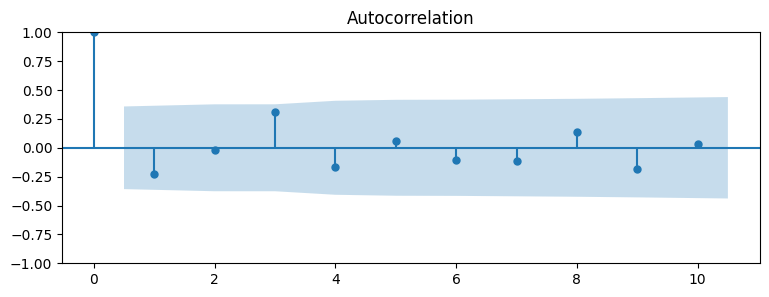

In [171]:
# figure 9 x 3
fig, ax = plt.subplots(figsize=(9, 3))
#plot acf
acf_plot = plot_acf(series_b2.diff().diff().fillna(0), lags=10,ax=ax)

###### PACF

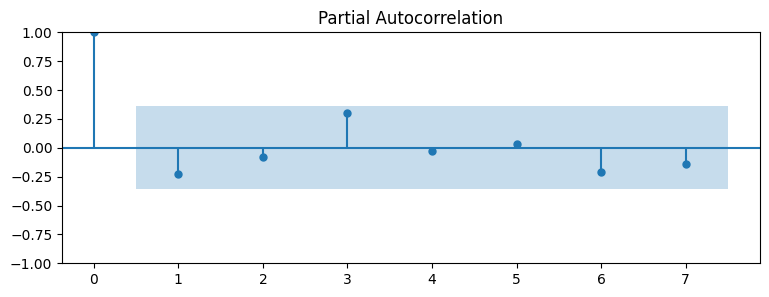

In [172]:
# figure 9 x 3
fig, ax = plt.subplots(figsize=(9, 3))
# ploy pacf
pacf_plot = plot_pacf(series_b2.diff().diff().fillna(0), lags=7, ax=ax,method='ywm')

Dari gambar diatas diperoleh nilai:
AR: 3
Diff: 2
MA: 3

In [173]:
# define model arima dengan kolom event
ar_model_b2 = ARIMA(df_b2['Sales'], order=(2,2,2))
ar_model_b2 = ar_model_b2.fit()

In [174]:
pred_ar_b2 = ar_model_b2.predict(start=X_test_b2.index[0], end=X_test_b2.index[-1])

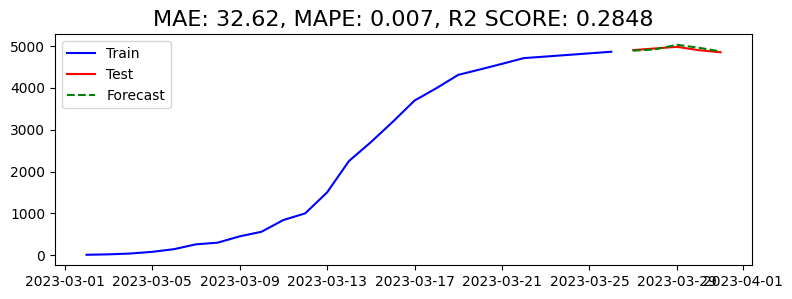

In [175]:
plot_eval(X_train_b2, X_test_b2, pred_ar_b2)

Hasil evaluasi pada Produk B2 dengan model ExponentialSmothing adalah:
* MAE: Rata-rata nilai eror prediksi terhadap data test adalah `32.62`. range nilai produk adala 10 - 4980. Artinya nilai erornya cukup kecil
* MAPE: Dengan nilai mae diperoleh persentasenya yaitu sebesar 0.7% ini membuktikan nilai erornya cukup cukup kecil
* R2 Score: sebesar 0.28 artinya data tidak kurang dapat mengikuti polanya.

  **Holt's Winter**   
| **Metrics**  | **A1** | **A2** | **B1** | **B2** |
|--------------|--------|--------|--------|--------|
| MAE |1.8009 | 2.6139| 131.5319| 43.7383 |
| MAPE | 0.9235|0.1710 |11.0443| 0.8941 |
| R2 SCORE | 0.8855| 0.9900|-0.5843 | -0.5281 |

  **Auto Arima**   
| **Metrics**  | **A1** | **A2** | **B1** | **B2** |
|--------------|--------|--------|--------|--------|
| MAE |2.1071 | 0.0170| 29.7861 | 32.6239 |
| MAPE |1.0783 |0.0011 |  2.5598 | 0.6627 |
| R2 SCORE | 0.8671| 1.0000|  0.9418 | 0.2848 |    

Dapat kita lihat pada metrik evaluasi bahwa model Auto Arima unggul di  3 produk yaitu A2, B1 dan B2 sehingga memutuskan menggukan model ARIMA

## 8. Model Saving

Selanjutnya model yang sudah dipilih akan di save menggunakan library `joblib` agar model yang sudah dipilih menjadi lebih efisien dalam komputasi sehingga model yang sudah dilatih dapat digunakan pada data baru.

In [180]:
# Model Saving

# produk a1
with open('a1_arima.pkl', 'wb') as file_1:
  joblib.dump(ar_model_a1, file_1)
# produk a2
with open('a2_arima.pkl', 'wb') as file_2:
  joblib.dump(ar_model_a2, file_2)
# produk b1
with open('b1_arima.pkl', 'wb') as file_3:
  joblib.dump(ar_model_b1, file_3)
#produk b2
with open('b2_arima.pkl', 'wb') as file_4:
  joblib.dump(ar_model_b2, file_4)

## 9. Model Inference

Selanjutnya adalah forecasting 14 hari kedapan 

##### Produk A1

In [181]:
n_inf_a1 = len(X_test_a1)+14
inf_a1 = ar_model_a1.predict(n_inf_a1)

dates = pd.date_range(X_test_a1.index[0], periods=n_inf_a1, freq='D')
inf_a1 = pd.Series(inf_a1, index=dates)
inf_a1 = inf_a1[len(X_test_a1):]

# Convert to dataframe
inf_a1 = pd.DataFrame(inf_a1)
inf_a1 = inf_a1.rename(columns={0:'Sales'})
inf_a1

,Sales
2023-04-01,212.89
2023-04-02,205.25
2023-04-03,206.50
2023-04-04,207.62
2023-04-05,208.81
2023-04-06,209.94
2023-04-07,212.08
2023-04-08,220.90
2023-04-09,213.59
2023-04-10,214.85


Data forecasting sudah diperoleh, selanjutnya membuat visualisasi, agar efisien akan dibuat function dengan nama `plot_forecasting`

In [182]:
def plot_forecasting(X_train, X_test, inference):

    plt.figure(figsize=[9,3])
    plt.plot(X_train, 'b-', label='Train')
    plt.plot(X_test, 'r-', label='Test')
    plt.plot(inference, 'g--',label='Forecast')
    plt.title(f"Forecasting 14 Hari Kedepan")
    plt.legend()
    plt.show()

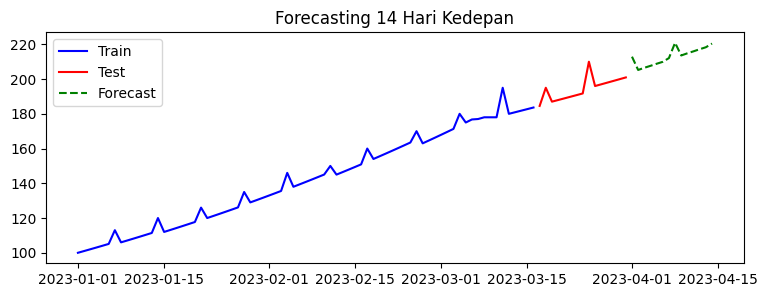

In [183]:
plot_forecasting(X_train_a1, X_test_a1, inf_a1)

##### Produk A2

In [184]:
# define range forcast
n_inf_a2 = len(X_test_a2)+14

# predict data
inf_a2 = ar_model_a2.predict(n_inf_a2)

# gabungkan hasil prediksi dengan tanggal
dates = pd.date_range(X_test_a2.index[0], periods=n_inf_a2, freq='D')
inf_a2 = pd.Series(inf_a2, index=dates)
inf_a2 = inf_a2[len(X_test_a2):]

# Convert to dataframe
inf_a2 = pd.DataFrame(inf_a2)
inf_a2 = inf_a2.rename(columns={0:'Sales'})
inf_a2

,Sales
2023-04-01,1611.50
2023-04-02,1574.32
2023-04-03,1582.19
2023-04-04,1590.09
2023-04-05,1598.03
2023-04-06,1606.01
2023-04-07,1614.02
2023-04-08,1667.08
2023-04-09,1630.18
2023-04-10,1638.31


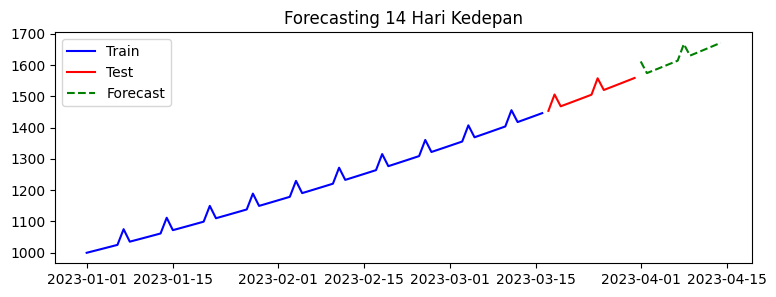

In [185]:
plot_forecasting(X_train_a2, X_test_a2, inf_a2)

##### Produk B1

In [187]:
# define range forcast
range_inf_b1 = len(X_test_b1)+14
# predict data
inf_b1 = ar_model_b1.predict('2023-03-31', '2023-04-14',exog=b1['Event'][90:])

# gabungkan hasil prediksi dengan tanggal
dates = pd.date_range(X_test_b1.index[0], periods=range_inf_b1, freq='D')
inf_b1 = pd.Series(inf_b1, index=dates)
inf_b1 = inf_b1[len(X_test_b1):]

# Convert jadi dataframe
inf_b1 = pd.DataFrame(inf_b1)
inf_b1 = inf_b1.rename(columns={'predicted_mean':'Sales'})
inf_b1

,Sales
2023-04-01,991.10
2023-04-02,1003.77
2023-04-03,991.05
2023-04-04,1642.07
2023-04-05,1003.12
2023-04-06,975.38
2023-04-07,1023.64
2023-04-08,986.23
2023-04-09,968.91
2023-04-10,1008.97


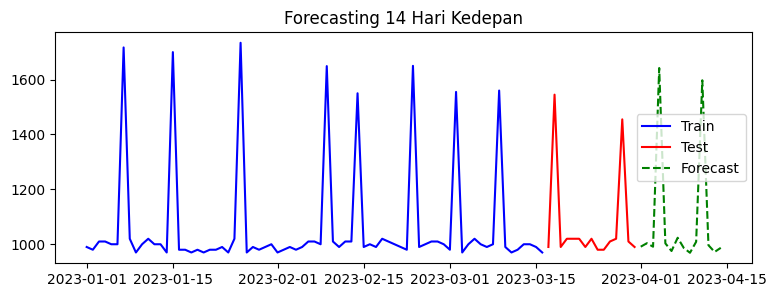

In [188]:
plot_forecasting(X_train_b1, X_test_b1, inf_b1)

##### Produk B2

In [206]:
# define range forcast
range_inf_b2 = len(X_test_b2)+14

# predict data
inf_b2 = ar_model_b2.predict('2023-03-31', '2023-04-14',exog=b2[30:])

# gabungkan hasil prediksi dengan tanggal
dates = pd.date_range(X_test_b2.index[0], periods=range_inf_b2, freq='D')
inf_b2 = pd.Series(inf_b2, index=dates)
inf_b2 = inf_b2[len(X_test_b2):]

# Convert jadi dataframe
inf_b2 = pd.DataFrame(inf_b2)
inf_b2 = inf_b2.rename(columns={'predicted_mean':'Sales'})
inf_b2

,Sales
2023-04-01,4776.73
2023-04-02,4692.68
2023-04-03,4648.54
2023-04-04,4549.97
2023-04-05,4501.38
2023-04-06,4424.00
2023-04-07,4345.27
2023-04-08,4296.44
2023-04-09,4200.35
2023-04-10,4152.24


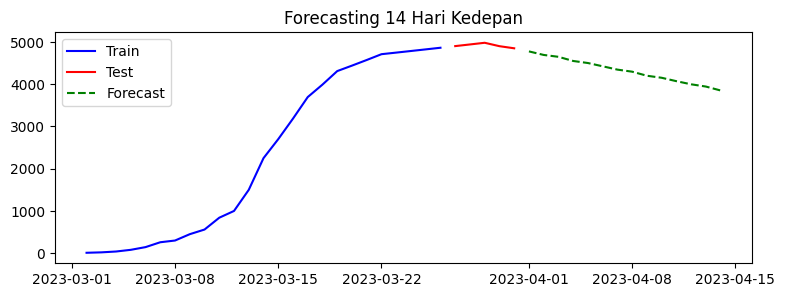

In [208]:
plot_forecasting(X_train_b2, X_test_b2, inf_b2)

## 10. Conclusions

Dalam proyek forecasting penjualan produk ini, saya menganalisis tren penjualan dari empat produk yang berbeda yaitu: A1, A2, B1 dan B2. Setiap produk memiliki karakteristik unil yang mempengaruhi model peramalan yang cocok dan kemampuan untuk memprediksi penjualan dimasa depan.

#### **Trend Analysis:**
1. Produk A1 dan A2:
    Produk A1 dan A2 menunjukkan peningkatan tren penjualan secara keseluruhan dan memiliki komponen musiman pada kurun waktu +- 7 hari.

2. Produk B1:
    Produk B1 tidak menunjukan tren peningkatan, tetapi memiliki komponen musiman yang meningkat akibat adanya event-event tertentu. 

3. Produk B2:
    Produk B2 memiliki tren peningkatan yang drastis tanpa adanya komponen musiman, namun pada akhir tren terlihat stagnan.

#### **Model Analysis:**
1. Exponential Smoothing Holt's Winter
    * Produk A1 dan A2: Model Exponential Smoothing Holt's Winter menunjukkan kinerja yang cukup baik dalam meramalkan penjualan kedua produk ini. Hal ini mengindikasikan bahwa model dapat mengatasi tren peningkatan dan komponen musiman yang ada pada produk A1 dan A2. 
    * Produk B1 dan B2: Model Exponential Smoothing Holt's Winter menunjukan kinerja yang kurang baik, mengindikasikan bahwa model ini tidak sesuai dengan karakteristik penjualan yang berkaitan dengan event dan tren yang berbeda.
    * Keanehan hasil pada produk B1 dan B2: nilai R2 Score yang negatif, menunjukan adanya masalah serius dalam model Exponential Smoothing Holt's Winter pada produk-produk ini.

2. ARIMA
    * Produk A1: Terjadi penurunan performa model ARIMA pada produk A1, meskipun tidak signifikan. Meskipun demikian, model ini masih memberikan hasil yang baik dalam meramalkan penjualan produk A1.
    * Produk A2, B1, dan B2: Model ARIMA mengalami peningkatan performa pada produk A2, B1, dan B2. Ini menunjukkan fleksibilitas model ARIMA dalam mengatasi berbagai jenis tren dan komponen dalam data.

#### **Further Improvement**
1. Performa model:
    Untuk meningkatkan performa dapat melakukan parameter tuning, dengan mengatur parameter yang lebih cocok dan beragam.

2. Model alternatif:
    Mencoba model lain seperti model yang berbasis jaringan saraf tiruan (neural networks)

3. Feature Engineering:
    Jika memungkinkan, pertimbangkan untuk menambahkan data atau fitur-fitur tambahan yang dapat meningkatkan kualitas peramalan. Ini bisa berupa informasi event, karakteristik produk lainnya atau faktor eksternal yang berdampak pada penjualan.

#### **Business Insight**
1. Produk A1:
    * Insight Bisnis: Pola penjualan produk A1 menunjukkan lonjakan peningkatan selama periode musiman tertentu.
Implikasi Bisnis: Bisnis perlu mempersiapkan stok yang lebih besar menjelang periode musiman ini untuk mengakomodasi permintaan yang lebih tinggi. Pengaturan stok yang baik akan memastikan ketersediaan produk dan menghindari kehilangan peluang penjualan.

2. Produk A2:
    * Insight Bisnis: Tren peningkatan yang stabil pada penjualan produk A2 berkorelasi dengan pertumbuhan yang lebih tinggi pada permintaan.
Implikasi Bisnis: Bisnis harus memperhatikan ketersediaan stok dan mengelola persediaan dengan baik untuk menjaga kesinambungan dalam memenuhi permintaan yang terus meningkat.

3. Produk B1:
    * Insight Bisnis: Event-event tertentu secara signifikan memengaruhi penjualan produk B1 dengan lonjakan permintaan yang tajam.
    * Implikasi Bisnis: Pengelolaan stok harus lebih adaptif terhadap event-event ini. Bisnis perlu memperkirakan stok lebih awal dan mengatur pemesanan agar dapat menghadapi permintaan yang lebih besar saat event terjadi.

4. Produk B2:
    * Insight Bisnis: Tren peningkatan drastis pada penjualan produk B2 menunjukkan perlunya persediaan yang cukup untuk memenuhi permintaan yang terus meningkat.
    * Implikasi Bisnis: Pengelolaan stok harus diatur sedemikian rupa untuk menjaga ketersediaan produk. Bisnis harus memiliki stok yang mencukupi untuk mengantisipasi lonjakan penjualan tanpa kekurangan stok.

## References

* Code to check data stationarity https://machinelearningmastery.com/time-series-data-stationary-python/ 